<a href="https://colab.research.google.com/github/MeghanGH/time-series-with-python/blob/main/Time_Series_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [15]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from google.colab import drive


In [16]:
drive.mount('/content/drive')
multiTimeline = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/multiTimeline.csv'
multiTimeline_df = pd.read_csv(multiTimeline, skiprows=1)
multiTimeline_df.columns = ['month', 'diet', 'gym', 'finance']
multiTimeline_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


# Set index to_datetime

In [19]:
diet = multiTimeline_df[['month','diet']]
diet.set_index('month', inplace=True)

# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)
diet.head()

# https://www.datacamp.com/tutorial/time-series-analysis-tutorial

,diet
month,
2004-01-01,100
2004-02-01,75
2004-03-01,67
2004-04-01,70
2004-05-01,72


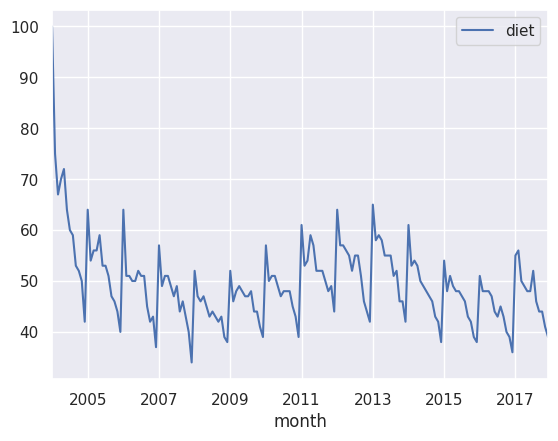

In [20]:
# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

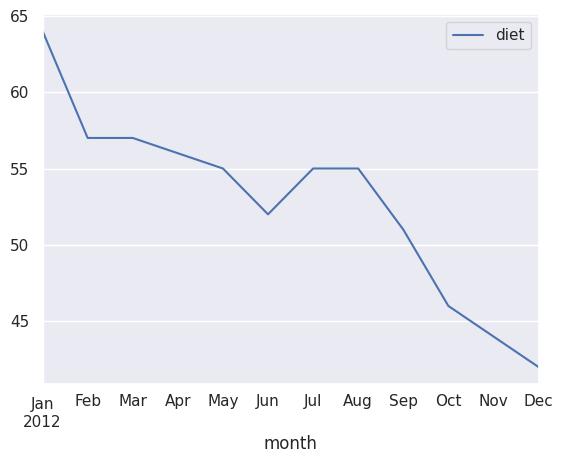

In [22]:
# Slice the dataset to keep only 2012
diet2012 = diet.loc['2012']

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

# Merging Time Series With Different Dates


In [25]:
stocks_data = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/stocks.csv'
stocks = pd.read_csv(stocks_data)
stocks.set_index('DATE', inplace=True)
stocks.head()

,SP500
DATE,
2013-11-04,1767.93
2013-11-05,1762.97
2013-11-06,1770.49
2013-11-07,1747.15
2013-11-08,1770.61


In [24]:
bonds_data = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/bonds.csv'
bonds = pd.read_csv(bonds_data)
bonds.set_index('DATE', inplace=True)
bonds.head()

,IRLTLT01USM156N
DATE,
2013-09-01,2.81
2013-10-01,2.62
2013-11-01,2.72
2013-12-01,2.90
2014-01-01,2.86


In [27]:
#Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner')
print(stocks_and_bonds.head())

{'2022-02-28', '2023-05-11', '2014-03-31', '2019-10-09', '2022-07-18', '2016-01-25', '2017-07-03', '2017-03-28', '2014-06-26', '2014-09-29', '2013-12-06', '2017-07-10', '2017-02-24', '2020-03-11', '2023-04-05', '2023-05-02', '2020-03-12', '2020-03-26', '2014-07-03', '2020-05-22', '2020-04-07', '2014-01-06', '2015-07-03', '2015-11-24', '2021-03-25', '2019-10-02', '2022-06-03', '2018-08-22', '2017-09-11', '2013-12-30', '2018-12-05', '2014-03-14', '2015-02-09', '2019-01-04', '2015-03-03', '2015-08-26', '2014-05-09', '2019-04-24', '2019-11-13', '2018-07-03', '2022-04-28', '2021-11-26', '2019-04-18', '2021-08-16', '2020-10-06', '2020-04-08', '2015-06-26', '2018-06-04', '2021-08-12', '2016-11-22', '2022-10-21', '2019-08-30', '2018-03-27', '2014-06-11', '2015-03-10', '2022-05-04', '2016-02-24', '2014-01-03', '2015-06-11', '2014-12-10', '2017-06-08', '2016-01-21', '2021-11-16', '2022-05-10', '2017-06-13', '2020-12-17', '2019-10-15', '2017-03-09', '2020-09-03', '2019-05-20', '2017-01-26', '2016